In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 

In [7]:
files = os.listdir('/content/uber_pickups_NJC')

In [8]:
files

['uber-raw-data-jun14.csv',
 '.ipynb_checkpoints',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv',
 'uber-raw-data-apr14.csv']

In [9]:
files.remove('.ipynb_checkpoints')

In [10]:
files

['uber-raw-data-jun14.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv',
 'uber-raw-data-apr14.csv']

In [13]:
path  = r'/content/uber_pickups_NJC'

concat_file = pd.DataFrame()

for file in files:
  df = pd.read_csv(path+'/'+file)
  concat_file = pd.concat([df,concat_file])

concat_file.shape

(4534327, 4)

In [16]:
df = concat_file.copy()

In [17]:
df.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [18]:
df.dtypes

Date/Time     object
Lat          float64
Lon          float64
Base          object
dtype: object

In [22]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'], format='%m/%d/%Y %H:%M:%S')

In [23]:
df.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
dtype: object

In [28]:
df['dayName'] = df['Date/Time'].dt.strftime("%A")
df['dayName'].head()

0    Tuesday
1    Tuesday
2    Tuesday
3    Tuesday
4    Tuesday
Name: dayName, dtype: object

In [32]:
df['dayName'].value_counts()

Thursday     755145
Friday       741139
Wednesday    696488
Tuesday      663789
Saturday     646114
Monday       541472
Sunday       490180
Name: dayName, dtype: int64

In [33]:
df['dayName'].value_counts().index

Index(['Thursday', 'Friday', 'Wednesday', 'Tuesday', 'Saturday', 'Monday',
       'Sunday'],
      dtype='object')

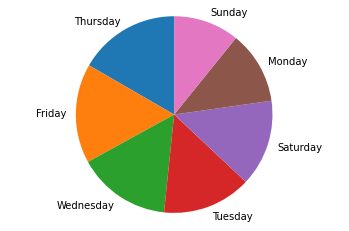

In [35]:
import matplotlib.pyplot as plt

fig1, ax1 = plt.subplots()
ax1.pie(df['dayName'].value_counts(), labels = df['dayName'].value_counts().index, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

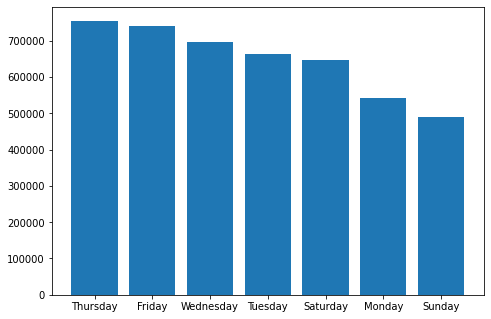

In [37]:
fig2 = plt.figure()
ax = fig2.add_axes([0,0,1,1])
ax.bar(df['dayName'].value_counts().index, df['dayName'].value_counts())
plt.show()

In [38]:
df['month'] = df['Date/Time'].dt.month

In [39]:
df['hour'] = df['Date/Time'].dt.hour

In [42]:
df.sample()

,Date/Time,Lat,Lon,Base,dayName,month,hour
177687,2014-06-18 14:58:00,40.6913,-73.9605,B02598,Wednesday,6,14


In [47]:
df['monthName'] = df['Date/Time'].dt.strftime("%B")

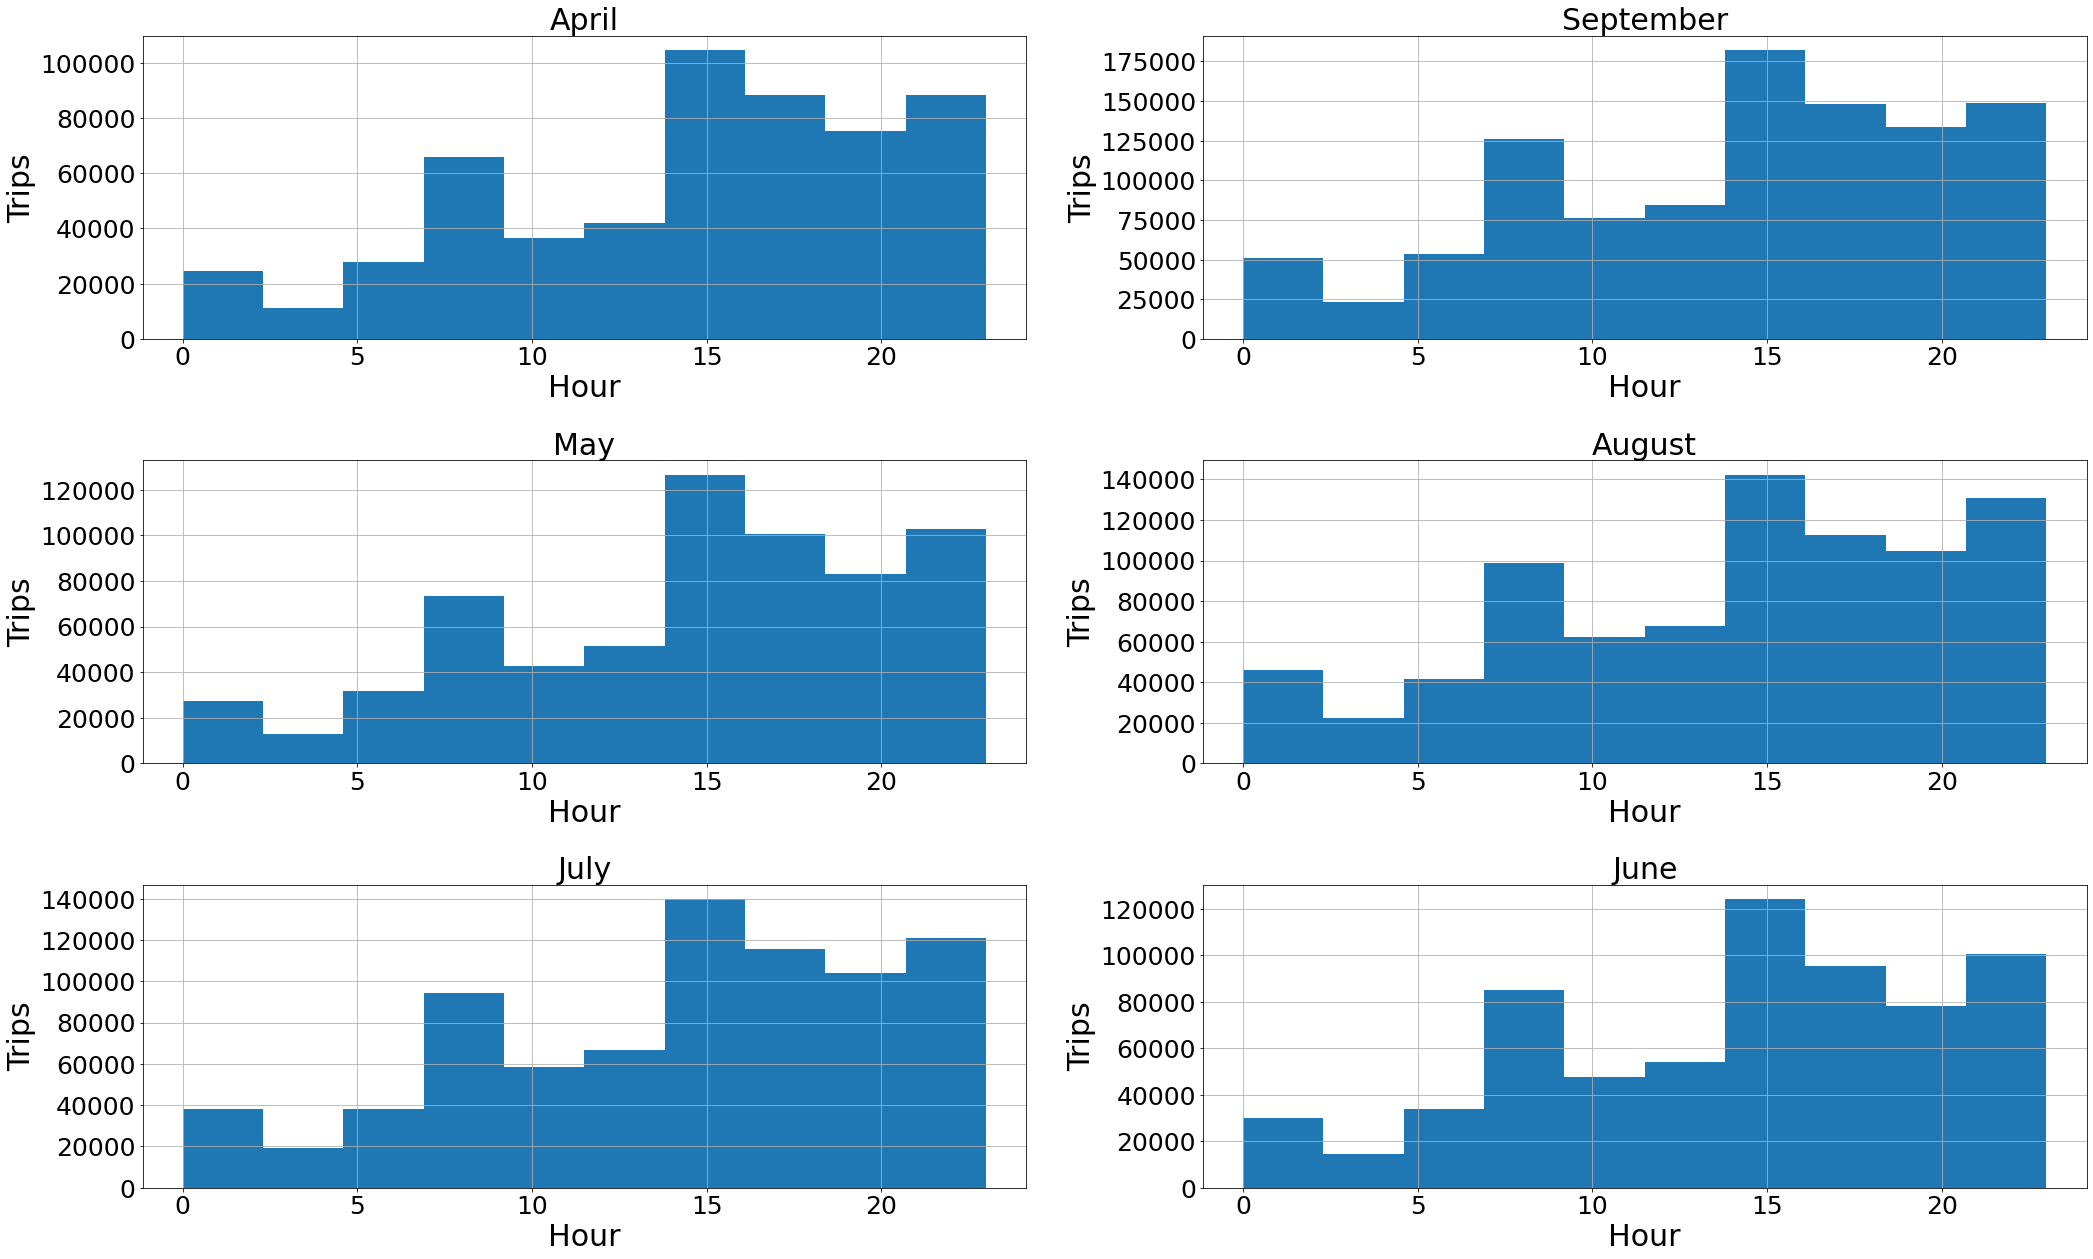

In [92]:
plt.figure(figsize=(40,20))

for i, month in enumerate(df['month'].unique()):
  plt.subplot(3,2, i+1)
  plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9, hspace = 0.4)
  df[df['month']==month]['hour'].hist()
  #print()
  plt.title(df['monthName'].unique()[i], fontsize=30)
  plt.xticks(fontsize=25)  
  plt.yticks(fontsize=25)
  plt.xlabel("Hour", fontsize=30)  
  plt.ylabel("Trips", fontsize=30)